In [23]:
# This EDA has a lot of vasualization and feature engineering
# also it is a great example of preparation of target variable, i.e. case status

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('us_perm_visas (1).csv')

In [26]:
df.shape

(374362, 154)

In [27]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [28]:
df.sample(1)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
84814,NaN,NaN,NaN,NaN,ONLINE,A-13056-43105,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Finance,NaN,NaN,NaN,71500.0,NaN,Year


In [29]:
df.tail(5)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN
374361,NaN,Phoenix,"Fragomen, Del Rey, Bernsen & Loewy, LLP",AZ,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"84,926.00","121,500.00",Year,NaN,NaN,NaN


In [30]:
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

In [31]:
df['case_no']

,case_no
0,A-07323-97014
1,A-07332-99439
2,A-07333-99643
3,A-07339-01930
4,A-07345-03565
...,...
374357,NaN
374358,NaN
374359,NaN
374360,NaN


In [32]:
df['case_number']

,case_number
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
374357,A-16363-85407
374358,A-16271-56745
374359,A-16354-82345
374360,A-16357-84250


In [33]:
#seeing the values of case_no and case_number it seems both have same meaning, i.e-visa application no
#few values at the top in case_no is null
#few values at the tail case_number is null

In [34]:
df['case_no'].nunique()

134990

In [35]:
df['case_number'].nunique()

238418

In [36]:
df.shape

(374362, 154)

In [38]:
df['case_number'].isna().sum()

135269

In [ ]:
# null value in case number is almost close to values in case no


In [39]:
134990 + 238418

373408

In [40]:
# how to solve this problem ?

In [42]:
df['case_number'] # top 135269 are null values

,case_number
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
374357,A-16363-85407
374358,A-16271-56745
374359,A-16354-82345
374360,A-16357-84250


In [43]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [44]:
df.columns.get_loc('case_no') # to get columns index

5

In [45]:
df.columns.get_loc('case_number')

6

In [46]:
case_no_index = df.columns.get_loc('case_no')

In [47]:
case_number_index = df.columns.get_loc('case_number')

In [48]:
casenumberlist = []
for value in df.iloc[0:135269, case_no_index]:
  casenumberlist.append(value)


for value in df.iloc[135269:374362, case_number_index]:
  casenumberlist.append(value)

In [49]:
casenumberlist

['A-07323-97014',
 'A-07332-99439',
 'A-07333-99643',
 'A-07339-01930',
 'A-07345-03565',
 'A-07352-06288',
 'A-07354-06926',
 'A-08004-10147',
 'A-08004-10184',
 'A-08010-11785',
 'A-08057-27232',
 'A-08058-28001',
 'A-08076-33611',
 'A-08085-36053',
 'A-08104-41821',
 'A-08120-47187',
 'A-08127-49255',
 'A-08148-55775',
 'A-08162-60225',
 'A-08164-61023',
 'A-08176-64095',
 'A-08182-66284',
 'A-08190-68131',
 'A-08190-68200',
 'A-08271-91261',
 'A-08200-71216',
 'A-08203-71676',
 'A-08211-73870',
 'A-08211-74089',
 'A-08212-74295',
 'A-08220-76622',
 'A-08221-77017',
 'A-08221-77195',
 'A-08224-77312',
 'A-08225-77723',
 'A-08227-78536',
 'A-08238-81419',
 'A-08238-81533',
 'A-08240-82338',
 'A-08241-82750',
 'A-08246-83350',
 'A-08247-83629',
 'A-08254-85569',
 'A-08255-86138',
 'A-08259-87626',
 'A-08260-88111',
 'A-08264-89308',
 'A-08267-89752',
 'A-08267-89878',
 'A-08270-91040',
 'A-08276-92533',
 'A-08276-92560',
 'A-08280-93353',
 'A-08280-93404',
 'A-08280-93430',
 'A-08284-

In [50]:
df['casenumber'] = casenumberlist

In [51]:
df.drop(['case_no', 'case_number'], axis = 1, inplace = True)

In [52]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber'],
      dtype='object', length=153)

In [53]:
# this is the way

In [55]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [58]:
for value in df.case_status.unique():
  print(len(df[df['case_status'] == value]))

181933
25649
148586
18194


In [59]:
# or
df.case_status.value_counts()

,count
case_status,
Certified,181933
Certified-Expired,148586
Denied,25649
Withdrawn,18194


In [61]:
df = df[df.case_status != 'Withdrawn']

In [62]:
df.case_status.value_counts()

,count
case_status,
Certified,181933
Certified-Expired,148586
Denied,25649


In [67]:
df.loc[df.case_status == "Certified-Expired", "case_status"] = "Certified"

In [68]:
df.case_status.value_counts()

,count
case_status,
Certified,330519
Denied,25649


In [69]:
df.case_status.value_counts(normalize = True) * 100

,proportion
case_status,
Certified,92.798623
Denied,7.201377


In [70]:
# insights >> 7.2 percent of the visa application were denied

In [71]:
df.isnull().sum()

,0
add_these_pw_job_title_9089,317031
agent_city,153452
agent_firm_name,157646
agent_state,156544
application_type,229320
...,...
wage_offer_unit_of_pay_9089,108769
wage_offered_from_9089,248582
wage_offered_to_9089,326852
wage_offered_unit_of_pay_9089,289470


In [72]:
# dropping all empty rows and columns
# if all the values of row and column are null
df.dropna(axis = 1, how = 'all', inplace = True)
df.dropna(axis = 0, how = 'all', inplace = True)

In [73]:
df.isnull().sum()

,0
add_these_pw_job_title_9089,317031
agent_city,153452
agent_firm_name,157646
agent_state,156544
application_type,229320
...,...
wage_offer_unit_of_pay_9089,108769
wage_offered_from_9089,248582
wage_offered_to_9089,326852
wage_offered_unit_of_pay_9089,289470


In [74]:
for col in df.columns:
  print(f"The missing values for {col} is {df[col].isnull().sum()}")

The missing values for add_these_pw_job_title_9089 is 317031
The missing values for agent_city is 153452
The missing values for agent_firm_name is 157646
The missing values for agent_state is 156544
The missing values for application_type is 229320
The missing values for case_received_date is 126848
The missing values for case_status is 0
The missing values for class_of_admission is 21085
The missing values for country_of_citizenship is 19272
The missing values for country_of_citzenship is 336951
The missing values for decision_date is 0
The missing values for employer_address_1 is 37
The missing values for employer_address_2 is 236133
The missing values for employer_city is 10
The missing values for employer_country is 126920
The missing values for employer_decl_info_title is 126886
The missing values for employer_name is 8
The missing values for employer_num_employees is 126925
The missing values for employer_phone is 126883
The missing values for employer_phone_ext is 333670
The mis

In [75]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber'],
      dtype='object', length=153)

In [76]:
df['decision_date']

,decision_date
0,2012-02-01
1,2011-12-21
2,2011-12-01
3,2011-12-01
4,2012-01-26
...,...
374349,2016-12-30
374350,2016-12-30
374351,2016-12-30
374352,2016-12-30


In [77]:
df['decision_date'] = pd.to_datetime(df['decision_date'])

In [78]:
df['decision_date']

,decision_date
0,2012-02-01
1,2011-12-21
2,2011-12-01
3,2011-12-01
4,2012-01-26
...,...
374349,2016-12-30
374350,2016-12-30
374351,2016-12-30
374352,2016-12-30


In [81]:
df['year'] = df['decision_date'].dt.year
df['month'] = df['decision_date'].dt.month
df['day'] = df['decision_date'].dt.day

<Axes: xlabel='year', ylabel='count'>

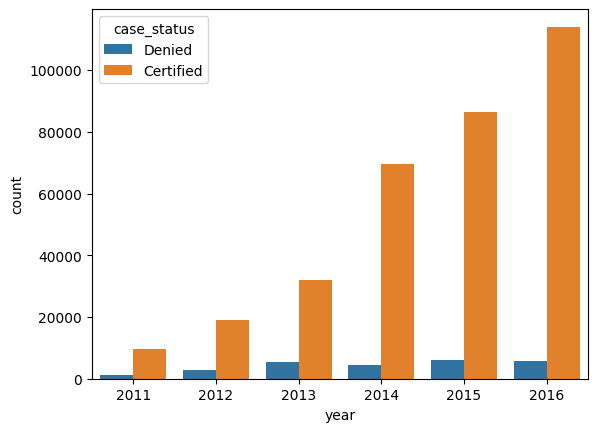

In [82]:
# year wise status

sns.countplot(x = 'year', hue = 'case_status', data = df)

In [83]:
# insights
# upward trend
# 2016-highest

In [84]:
df.employer_city.unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'austin',
       'Carson City', 'Northfield'], dtype=object)

In [85]:
df.employer_city.value_counts()

,count
employer_city,
NEW YORK,15992
COLLEGE STATION,11983
SANTA CLARA,10446
SAN JOSE,9004
REDMOND,8469
...,...
PARADISE,1
GRANITE SPRINGS,1
GALLIANO,1


In [88]:
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'PERRYSVILLE',
       'STILWELL', 'ROYAL OAKS'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'NEW YORK'),
  Text(1, 0, 'COLLEGE STATION'),
  Text(2, 0, 'SANTA CLARA'),
  Text(3, 0, 'SAN JOSE'),
  Text(4, 0, 'REDMOND'),
  Text(5, 0, 'MOUNTAIN VIEW'),
  Text(6, 0, 'HOUSTON'),
  Text(7, 0, 'SAN FRANCISCO'),
  Text(8, 0, 'SUNNYVALE'),
  Text(9, 0, 'PLANO')])

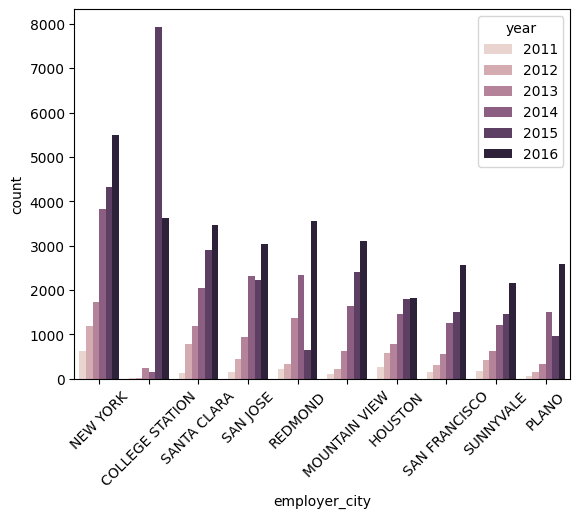

In [90]:
# employer city year wise : year which are the city where the visa approved people are working

sns.countplot(x = 'employer_city', hue = 'year', data = df, order = df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation = 45)

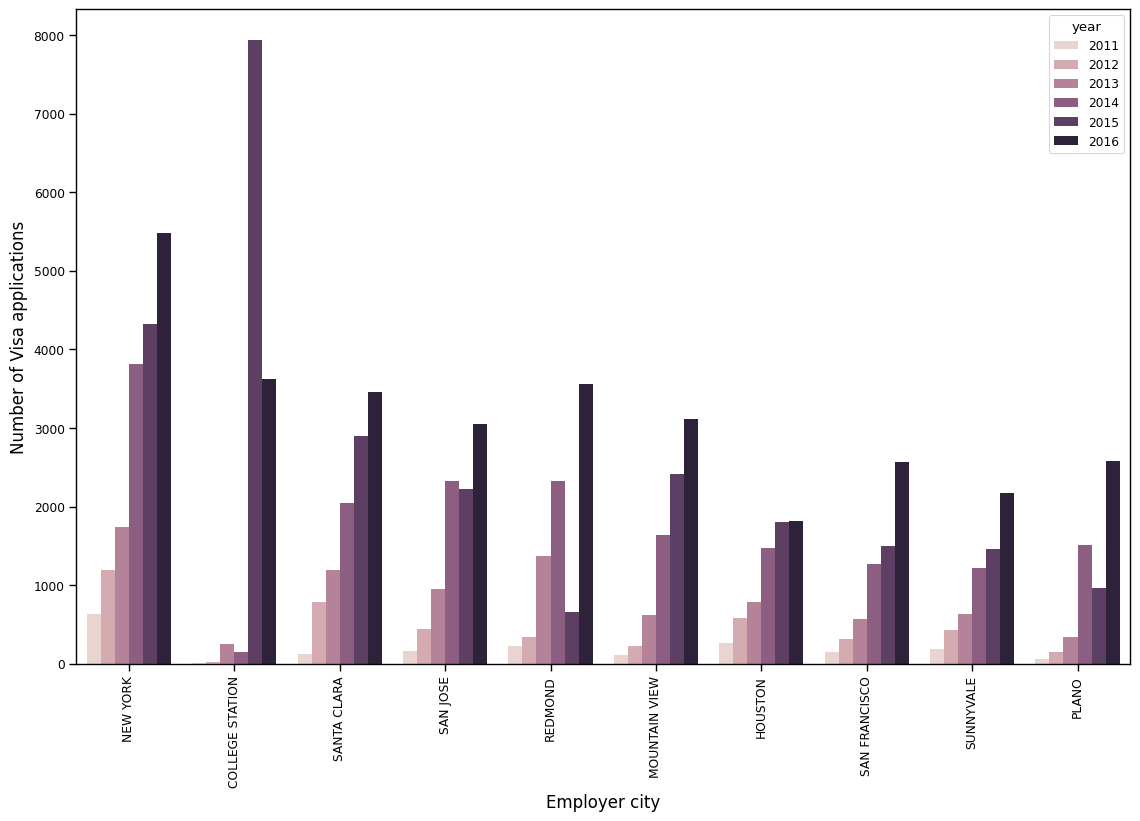

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(13.6, 8.5)

sns.set_context('paper', rc={'font.size':12, 'axes.titlesize':12, 'axes.labelsize':12})
sns.countplot(x = 'employer_city', hue = 'year', data = df, order = df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')
plt.show()

In [ ]:
# insights

In [93]:
# top 10 employer by visa application

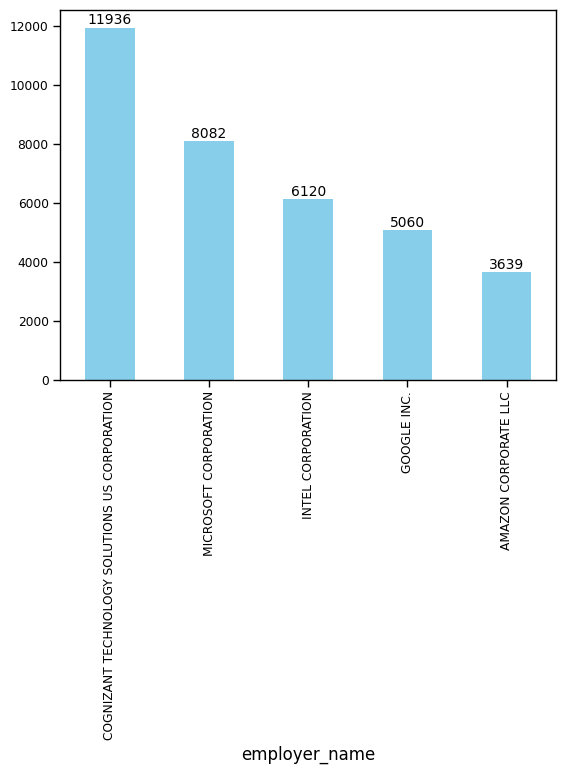

In [94]:
top_emp = df['employer_name'].value_counts().head()
top_emp.plot(kind = 'bar', color = 'skyblue')
for i, v in enumerate(top_emp):
  plt.text(i, v+10, str(v), ha = 'center', va = 'bottom', fontsize = 10)


In [ ]:
# insights

In [95]:
df['us_economic_sector']

,us_economic_sector
0,IT
1,Other Economic Sector
2,Aerospace
3,Other Economic Sector
4,Advanced Mfg
...,...
374349,NaN
374350,NaN
374351,NaN
374352,NaN


In [96]:
# value_counts function from scratch

In [98]:
us_economic_counts = {}
for value in df['us_economic_sector'].dropna():
  if value in us_economic_counts:
    us_economic_counts[value] += 1
  else:
    us_economic_counts[value] = 1

In [99]:
us_economic_counts

{'IT': 49311,
 'Other Economic Sector': 14662,
 'Aerospace': 3917,
 'Advanced Mfg': 17601,
 'Educational Services': 8561,
 'Retail': 4208,
 'Construction': 1315,
 'Hospitality': 1767,
 'Automotive': 1084,
 'Health Care': 6407,
 'Agribusiness': 784,
 'Finance': 8686,
 'Energy': 1021,
 'Transportation': 893,
 'Homeland Security': 78,
 'Biotechnology': 436,
 'Geospatial': 137}

In [100]:
# nos as key and names of sector as list
usecollabels = []
usecolvalues = []

for key, value in us_economic_counts.items():
  usecollabels.append(value)
  usecolvalues.append(key)

In [101]:
usecollabels

[49311,
 14662,
 3917,
 17601,
 8561,
 4208,
 1315,
 1767,
 1084,
 6407,
 784,
 8686,
 1021,
 893,
 78,
 436,
 137]

In [102]:
usecolvalues

['IT',
 'Other Economic Sector',
 'Aerospace',
 'Advanced Mfg',
 'Educational Services',
 'Retail',
 'Construction',
 'Hospitality',
 'Automotive',
 'Health Care',
 'Agribusiness',
 'Finance',
 'Energy',
 'Transportation',
 'Homeland Security',
 'Biotechnology',
 'Geospatial']

ValueError: could not convert string to float: 'IT'

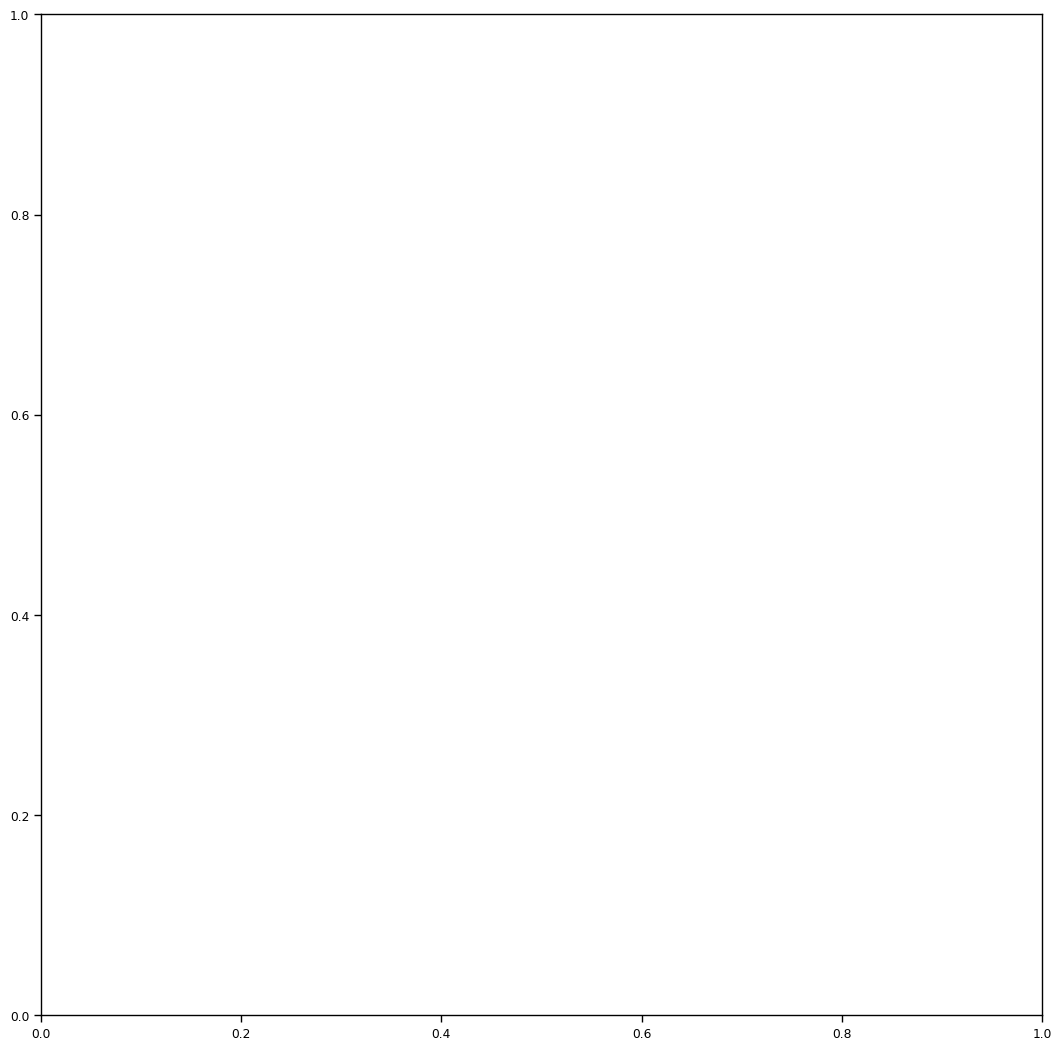

In [105]:
plt.figure(figsize = (13, 13))
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)
plt.pie(usecolvalues[:10], labels = usecollabels[:10], explode = explode, shadow=True, autopct = "%1.1f%%")
plt.show()

In [106]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber',
       'year', 'month', 'day'],
      dtype='object', length=156)

In [107]:
df.job_info_job_title.value_counts()[:20]

,count
job_info_job_title,
Software Engineer,14372
Computer Systems Analyst - V,4747
Senior Software Engineer,3801
Computer Systems Analyst - II,3416
Software Developer,2880
Assistant Professor,2604
Programmer Analyst,2534
Computer Systems Analyst - IV,2496
Systems Analyst,2034


In [108]:
#Computer Systems Analyst - V , Computer Systems Analyst - IV and so on, have different job title
#but job profile/domain is same

# software engineer , SOFTWARE ENGINEER, Sr. Software Engineer >> all of this should come in same profile


In [109]:
#converting to lower case
df.job_info_job_title = df.job_info_job_title.str.lower()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

,count
job_info_job_title,
software engineer,18582
computer systems analyst,12054
senior software engineer,5802
software developer,4501
programmer analyst,3763
assistant professor,2869
software development engineer,2766
systems analyst,2587
senior programmer analyst,1884


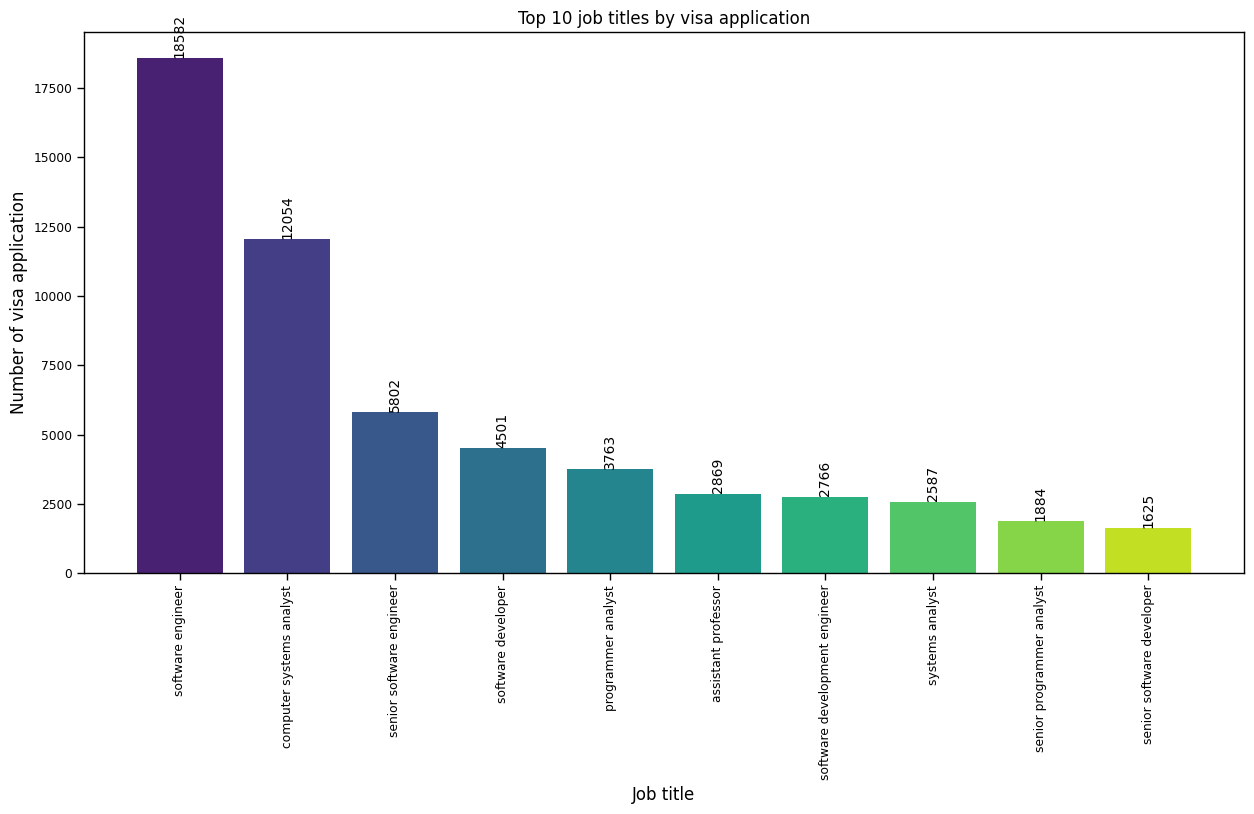

In [110]:
#get the top 10 job titles by count
top_job_titles = df.job_info_job_title.value_counts().head(10)
#create a bar plot
plt.figure(figsize = (12.7, 8.3))
plt.bar(top_job_titles.index, top_job_titles,  color=sns.color_palette("viridis", len(top_job_titles)))

#add count labels above the bar
for i, v in enumerate(top_job_titles):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10, rotation=90)

plt.xlabel("Job title")
plt.ylabel("Number of visa application")
plt.title("Top 10 job titles by visa application")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [111]:
#insights>> software engineer applies most visa application

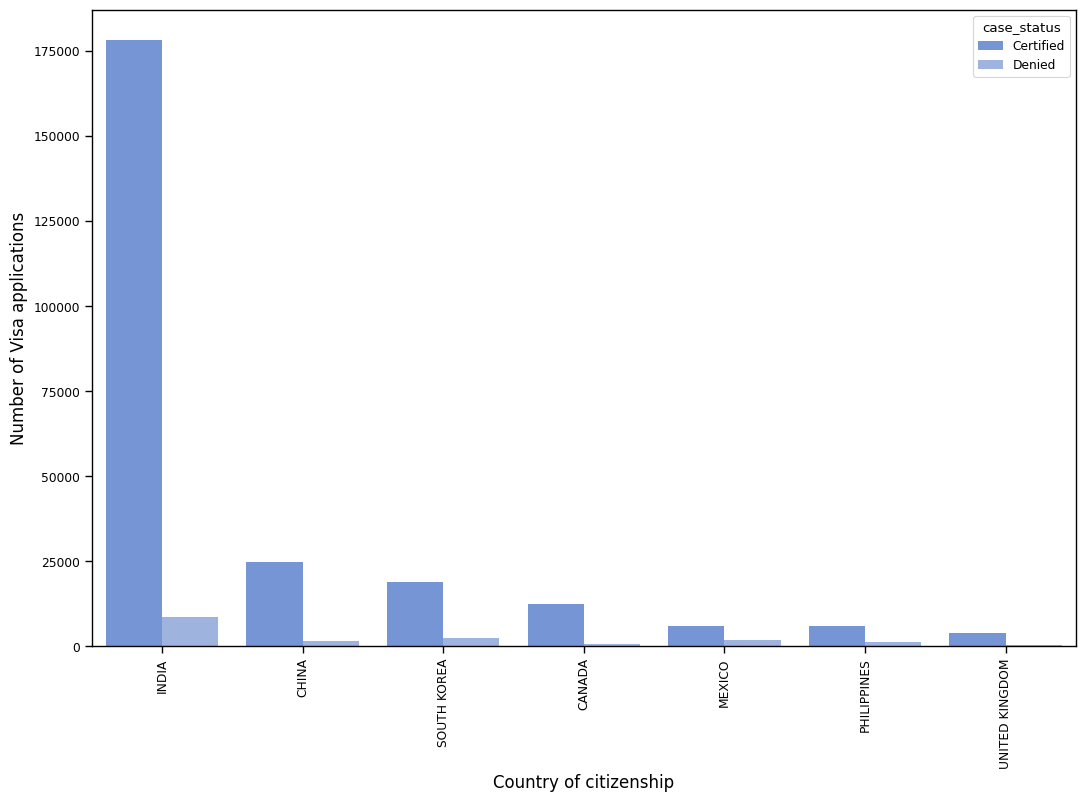

In [112]:
#convert country_of_citizenship column to categroical data type
df.country_of_citizenship = pd.Categorical(df.country_of_citizenship)

fig, ax = plt.subplots(figsize=(12.7, 8.27))
sns.set_context(rc={"font.size":14, "axes.labelsize":12})

# Creating the count plot
sns.countplot(x='country_of_citizenship', hue='case_status', data=df,
              palette=sns.diverging_palette(255, 133, l=60, n=7, center="light"),
              order=df.country_of_citizenship.value_counts().iloc[:7].index)

plt.xticks(rotation=90)

# Setting label titles
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applications')

plt.show()  # This line is necessary to display the plot


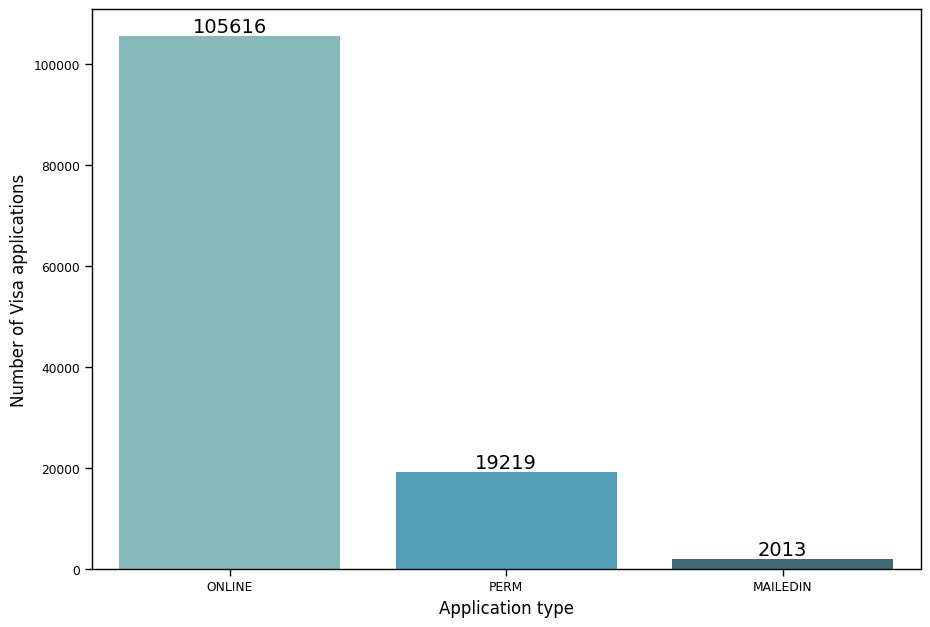

In [113]:
# Setting plot parameters
plt.figure(figsize=(10.7, 7.27))

# Creating the count plot
sns.countplot(x='application_type', data=df, palette='GnBu_d', order=df['application_type'].value_counts().index[:10])

# Iterating over elements in "application_type" column and displaying counts above bars
for i, v in enumerate(df['application_type'].value_counts().head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Setting labels
plt.xlabel('Application type')
plt.ylabel('Number of Visa applications')
plt.show()

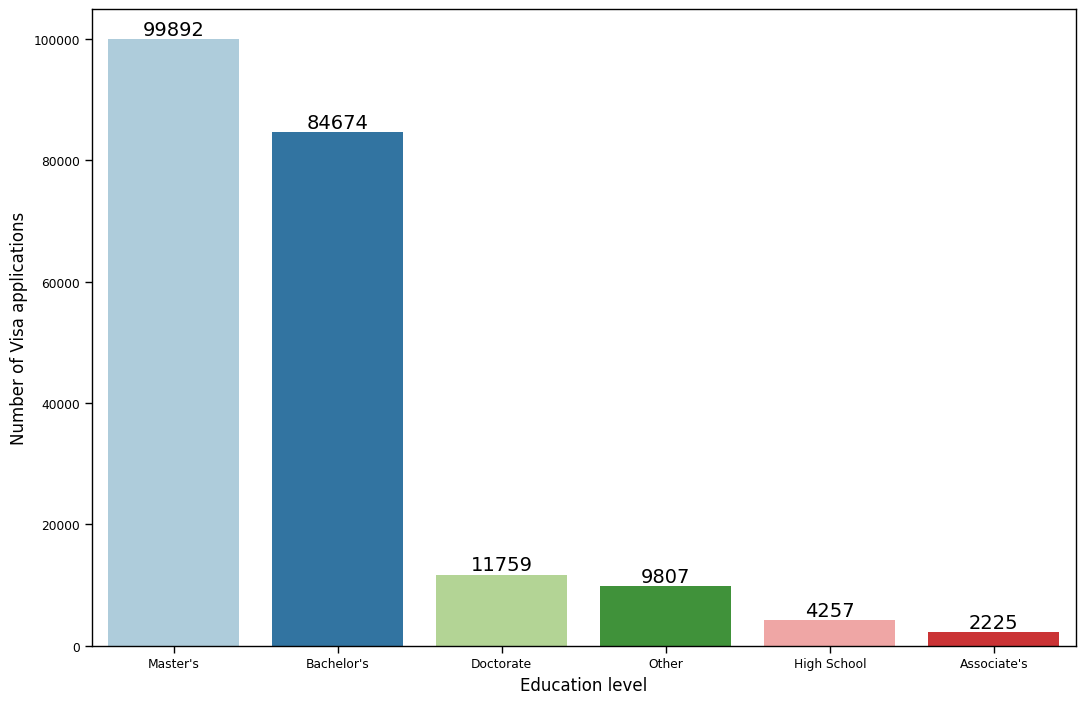

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)

# Creating the count plot
sns.countplot(x='foreign_worker_info_education', data=df,
              palette=sns.color_palette("Paired"),
              order=df['foreign_worker_info_education'].value_counts().index[:10])

# Iterating over elements in "foreign_worker_info_education" column and displaying counts above bars
for i, v in enumerate(df['foreign_worker_info_education'].value_counts().head(10)):
    ax.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom')

# Setting label titles
ax.set(xlabel='Education level', ylabel='Number of Visa applications')
plt.show()


In [115]:
#percentage of non null values

i = 0;
for col in df.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*df[col].count()/len(df['case_status']),decimals=2),"% non-null values" )

0 Column: 'add_these_pw_job_title_9089' contains  10.99 % non-null values
1 Column: 'agent_city' contains  56.92 % non-null values
2 Column: 'agent_firm_name' contains  55.74 % non-null values
3 Column: 'agent_state' contains  56.05 % non-null values
4 Column: 'application_type' contains  35.61 % non-null values
5 Column: 'case_received_date' contains  64.39 % non-null values
6 Column: 'case_status' contains  100.0 % non-null values
7 Column: 'class_of_admission' contains  94.08 % non-null values
8 Column: 'country_of_citizenship' contains  94.59 % non-null values
9 Column: 'country_of_citzenship' contains  5.4 % non-null values
10 Column: 'decision_date' contains  100.0 % non-null values
11 Column: 'employer_address_1' contains  99.99 % non-null values
12 Column: 'employer_address_2' contains  33.7 % non-null values
13 Column: 'employer_city' contains  100.0 % non-null values
14 Column: 'employer_country' contains  64.37 % non-null values
15 Column: 'employer_decl_info_title' contains

In [116]:
#keep the columns with non null values count > 33000

df = df.loc[:, df.count()>= 330000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   case_status             356168 non-null  object        
 1   class_of_admission      335083 non-null  object        
 2   country_of_citizenship  336896 non-null  category      
 3   decision_date           356168 non-null  datetime64[ns]
 4   employer_address_1      356131 non-null  object        
 5   employer_city           356158 non-null  object        
 6   employer_name           356160 non-null  object        
 7   employer_postal_code    356135 non-null  object        
 8   employer_state          356131 non-null  object        
 9   job_info_work_city      356073 non-null  object        
 10  job_info_work_state     356072 non-null  object        
 11  pw_amount_9089          353965 non-null  object        
 12  pw_soc_code             355594 non-

In [117]:
df.case_status

,case_status
0,Certified
1,Denied
2,Certified
3,Certified
4,Certified
...,...
374349,Certified
374350,Certified
374351,Certified
374352,Certified


In [118]:
df.loc[df['case_status'] == 'Certified', 'case_status'] =1
df.loc[df['case_status'] == 'Denied', 'case_status'] =0

In [119]:
df['case_status'] .unique()

array([1, 0], dtype=object)

In [120]:
df['employer_state'].isnull().sum()

37

In [121]:
df['employer_state'].mode()[0]

'CALIFORNIA'

In [122]:
df['employer_state'] = df['employer_state'].fillna(df['employer_state'].mode()[0])

In [123]:
df['employer_state'].isnull().sum()

0

In [124]:
df['employer_state']

,employer_state
0,NY
1,NY
2,VA
3,NY
4,NY
...,...
374349,KY
374350,OH
374351,CA
374352,NY


In [125]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Dictionary for mapping state names to abbreviations
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP',
    'Palau': 'PW',
    'Puerto Rico': 'PR',
    'Virgin Islands': 'VI',
    'District of Columbia': 'DC'
}

# Reverse dictionary for abbreviation to state name mapping
abbrev_to_state = {v: k.upper() for k, v in state_abbrevs.items()}

# Clean and transform employer_state column in DataFrame
df['employer_state'] = df['employer_state'].fillna('').astype(str).str.strip().str.upper()

# Replace abbreviations with full state names
df['employer_state'] = df['employer_state'].replace(abbrev_to_state)


In [126]:
df['employer_state']

,employer_state
0,NEW YORK
1,NEW YORK
2,VIRGINIA
3,NEW YORK
4,NEW YORK
...,...
374349,KENTUCKY
374350,OHIO
374351,CALIFORNIA
374352,NEW YORK


In [127]:
df.pw_soc_code

,pw_soc_code
0,15-1031.00
1,47-4041.00
2,17-2051.00
3,43-4071.00
4,41-9031.00
...,...
374349,15-1132
374350,15-1132
374351,15-1121
374352,15-1122


In [128]:
df['pw_soc_code'] = df['pw_soc_code'].str.replace('.','')
df['pw_soc_code'] = df['pw_soc_code'].str.replace('-','')
df['pw_soc_code'] = df['pw_soc_code'].astype(str).str[0:6]
df['pw_soc_code'].value_counts()

#Finding "nan" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "nan",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Finding "None" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "None",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Changing type from string to int
df['pw_soc_code'] = df['pw_soc_code'].astype(int)
df['case_status'] = df['case_status'].astype(int)

In [129]:
df['case_status']

,case_status
0,1
1,0
2,1
3,1
4,1
...,...
374349,1
374350,1
374351,1
374352,1


In [130]:
#missing value treatment for other columns

#Replacing missing values with mode
df['class_of_admission']=df['class_of_admission'].fillna((df['class_of_admission'].mode()[0]))
df['country_of_citizenship']=df['country_of_citizenship'].fillna((df['country_of_citizenship'].mode()[0]))
df['employer_city']=df['employer_city'].fillna((df['employer_city'].mode()[0]))
df['employer_name']=df['employer_name'].fillna((df['employer_name'].mode()[0]))
df['employer_name']=df['employer_name'].astype(str).str.upper()
df['pw_source_name_9089']=df['pw_source_name_9089'].fillna((df['pw_source_name_9089'].mode()[0]))

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   case_status             356168 non-null  int64         
 1   class_of_admission      356168 non-null  object        
 2   country_of_citizenship  356168 non-null  category      
 3   decision_date           356168 non-null  datetime64[ns]
 4   employer_address_1      356131 non-null  object        
 5   employer_city           356168 non-null  object        
 6   employer_name           356168 non-null  object        
 7   employer_postal_code    356135 non-null  object        
 8   employer_state          356168 non-null  object        
 9   job_info_work_city      356073 non-null  object        
 10  job_info_work_state     356072 non-null  object        
 11  pw_amount_9089          353965 non-null  object        
 12  pw_soc_code             356168 non-

In [132]:
# Convert the column containing numerical values with commas to numeric format
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(',', '').astype(float)

# Now, you can replace null values in the numerical column with the median
median_pw_amount = df['pw_amount_9089'].median()
df['pw_amount_9089'].fillna(median_pw_amount, inplace=True)

# Verify that there are no more null values
print(df.isnull().sum())

case_status                  0
class_of_admission           0
country_of_citizenship       0
decision_date                0
employer_address_1          37
employer_city                0
employer_name                0
employer_postal_code        33
employer_state               0
job_info_work_city          95
job_info_work_state         96
pw_amount_9089               0
pw_soc_code                  0
pw_soc_title              2321
pw_source_name_9089          0
pw_unit_of_pay_9089       1481
casenumber                   0
year                         0
month                        0
day                          0
dtype: int64


In [133]:
#Indices of selected features for categorcal data to do encoding
chosen_attrs = [0,1,2,5,6,8,12,14,17]
df = df.iloc[:,chosen_attrs]

In [134]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = {}

#Creating categories denoted by integers from column values
for col in df.columns:
    cat_var_name = "cat_"+ col
    cat_var_name = LabelEncoder()
    cat_var_name.fit(df[col])
    df[col] = cat_var_name.transform(df[col])
    categorical_variables[col] = cat_var_name

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   case_status             356168 non-null  int64
 1   class_of_admission      356168 non-null  int64
 2   country_of_citizenship  356168 non-null  int64
 3   employer_city           356168 non-null  int64
 4   employer_name           356168 non-null  int64
 5   employer_state          356168 non-null  int64
 6   pw_soc_code             356168 non-null  int64
 7   pw_source_name_9089     356168 non-null  int64
 8   year                    356168 non-null  int64
dtypes: int64(9)
memory usage: 27.2 MB


In [135]:
df

,case_status,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_state,pw_soc_code,pw_source_name_9089,year
0,1,28,79,3506,42973,37,76,3,1
1,0,5,79,749,47896,37,592,3,0
2,1,19,79,1897,54186,54,122,3,0
3,1,5,79,1694,18698,37,511,3,0
4,1,31,79,53,2602,37,493,3,1
...,...,...,...,...,...,...,...,...,...
374349,1,19,79,2190,48352,21,96,3,5
374350,1,19,79,3173,55538,41,96,3,5
374351,1,31,79,4476,24596,6,93,3,5
374352,1,19,79,3506,16913,37,94,4,5
